## Predictive modelling 
### Week 4-1: Feature Engineering Part 2

#### Content 
1. Predictors transformation - scaling
2. Predictors transformation - categorical variables

In [1]:
# libraries
import pandas as pd # process dataframe
import numpy as np # scientific calculation
import seaborn as sns # visualization complete stastistics
import matplotlib.pyplot as plt # visualization

### 0. Dataset

In [2]:
data_arr = np.array([1, 1.5, 2, 2, 3, 3, 5, 6, 7, 10])

df = pd.DataFrame({
    'Target': [12, 9.5, 8.7, 9.5, 10, 15, 9, 9.1, 8.2, 11],
    'Feature_1': [3, 1.3, 0.7, 1.5, 2, 4, 0.9, 0.88, 1.11, 3],
    'Feature_2': [3, 2.5, 5.7, 1, np.nan, 4.4, 3.3, np.nan, 2, 1],
    'Feature_3': [1, 1, 1.5, 2, 3, 3, 7, 2, 3, 5],
    'Feature_4': ['A', 'A', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'A']
})

df_test = pd.DataFrame({
    'Feature_1': [3, 1.3, 0.7, 17, 2],
    'Feature_2': [3, 2.5, 5.7, 1, np.nan],
    'Feature_3': [-1, 1, 1.5, 2, 3],
    'Feature_4': ['A', 'A', 'B', 'B', 'B']
})

display(data_arr)
display(df)
display(df_test)

array([ 1. ,  1.5,  2. ,  2. ,  3. ,  3. ,  5. ,  6. ,  7. , 10. ])

,Target,Feature_1,Feature_2,Feature_3,Feature_4
0,12.0,3.00,3.0,1.0,A
1,9.5,1.30,2.5,1.0,A
2,8.7,0.70,5.7,1.5,B
3,9.5,1.50,1.0,2.0,B
4,10.0,2.00,NaN,3.0,B
5,15.0,4.00,4.4,3.0,A
6,9.0,0.90,3.3,7.0,A
7,9.1,0.88,NaN,2.0,A
8,8.2,1.11,2.0,3.0,B
9,11.0,3.00,1.0,5.0,A


,Feature_1,Feature_2,Feature_3,Feature_4
0,3.0,3.0,-1.0,A
1,1.3,2.5,1.0,A
2,0.7,5.7,1.5,B
3,17.0,1.0,2.0,B
4,2.0,NaN,3.0,B


### 1. Scaling
Scaling is tranformation method to make all predictors to be in the same scale. The main purpose of scaling is to normailize the effect of each predictor. <br>

#### 1.1 Min-max scaling
The min-max scaling refers to a method of putting the data into a range of 0-1. The transformation is calculated using the formula below. 

\begin{equation}
X_{sc} = 
\frac{(X - X_{min})}{(X_{max} - X_{min})}
\end{equation}

Hence, we can build a function in python based on the equation




In [3]:
def min_max_scale(X_array):
    X_sc = (X_array - min(X_array)) / (max(X_array) - min(X_array))
    return X_sc

In [4]:
display(data_arr)
display(min_max_scale(data_arr))

array([ 1. ,  1.5,  2. ,  2. ,  3. ,  3. ,  5. ,  6. ,  7. , 10. ])

array([0.        , 0.05555556, 0.11111111, 0.11111111, 0.22222222,
       0.22222222, 0.44444444, 0.55555556, 0.66666667, 1.        ])

In a real practice, sklearn offers an instant function to perform the transformation. The standard syntax looks like below.

In [5]:
from sklearn.preprocessing import MinMaxScaler # load scaler from sklearn

# define data to be scaled 
x = df.drop(columns=['Target', 'Feature_4'])
x['Feature_2'] = x['Feature_2'].fillna(x['Feature_2'].mean()) # impute missing values if needed

scaler = MinMaxScaler() # instantiate the scaler
scaler_fit = scaler.fit(x) # fit the scaler on the data
x_sc = scaler_fit.transform(x) # tranform the data using the fitted scaler

display(x_sc) # the output of the tranformation is an array

array([[0.6969697 , 0.42553191, 0.        ],
       [0.18181818, 0.31914894, 0.        ],
       [0.        , 1.        , 0.08333333],
       [0.24242424, 0.        , 0.16666667],
       [0.39393939, 0.3962766 , 0.33333333],
       [1.        , 0.72340426, 0.33333333],
       [0.06060606, 0.4893617 , 1.        ],
       [0.05454545, 0.3962766 , 0.16666667],
       [0.12424242, 0.21276596, 0.33333333],
       [0.6969697 , 0.        , 0.66666667]])

Also, the output can be seen as a dataframe

In [6]:
x_sc_df = pd.DataFrame(x_sc, columns=x.columns)
x_sc_df 

,Feature_1,Feature_2,Feature_3
0,0.696970,0.425532,0.000000
1,0.181818,0.319149,0.000000
2,0.000000,1.000000,0.083333
3,0.242424,0.000000,0.166667
4,0.393939,0.396277,0.333333
5,1.000000,0.723404,0.333333
6,0.060606,0.489362,1.000000
7,0.054545,0.396277,0.166667
8,0.124242,0.212766,0.333333
9,0.696970,0.000000,0.666667


Scailing on the test set

In [7]:
# define data to be scaled 
x = df_test.drop(columns=['Feature_4'])
x['Feature_2'] = x['Feature_2'].fillna(x['Feature_2'].mean()) # impute missing values if needed

x_sc_test = scaler_fit.transform(x) # tranform the data using the fitted scaler

display(x_sc_test) # the output of the tranformation is an array

array([[ 0.6969697 ,  0.42553191, -0.33333333],
       [ 0.18181818,  0.31914894,  0.        ],
       [ 0.        ,  1.        ,  0.08333333],
       [ 4.93939394,  0.        ,  0.16666667],
       [ 0.39393939,  0.43617021,  0.33333333]])

In [8]:
x

,Feature_1,Feature_2,Feature_3
0,3.0,3.00,-1.0
1,1.3,2.50,1.0
2,0.7,5.70,1.5
3,17.0,1.00,2.0
4,2.0,3.05,3.0


In [9]:
x_test_sc_df = pd.DataFrame(x_sc_test, columns=x.columns)
x_test_sc_df 

,Feature_1,Feature_2,Feature_3
0,0.696970,0.425532,-0.333333
1,0.181818,0.319149,0.000000
2,0.000000,1.000000,0.083333
3,4.939394,0.000000,0.166667
4,0.393939,0.436170,0.333333


#### 1.2 Standard scaling
The standard scaling refers to a method of putting the be centered i.e. the mean will be zero and the stadard deviation is 1. The values that exceed one stadard deviation will have the scaled value more than 1 or less than -1 depending on whether they are located positively or negatively from the mean. The calculation is shown as. 

\begin{equation}
X_{sc} = 
\frac{X - Mean}{SD}
\end{equation}

Hence, we can build a function in python based on the equation

In [10]:
def standard_scale(X_array):
    X_sc = (X_array - np.mean(X_array)) / np.std(X_array)
    return X_sc, np.mean(X_array), np.std(X_array)

In [11]:
display(data_arr)
display(standard_scale(data_arr)[0])

array([ 1. ,  1.5,  2. ,  2. ,  3. ,  3. ,  5. ,  6. ,  7. , 10. ])

array([-1.11203573, -0.92973479, -0.74743385, -0.74743385, -0.38283197,
       -0.38283197,  0.34637178,  0.71097366,  1.07557554,  2.16938118])

In [12]:
print('The mean: ', standard_scale(data_arr)[1])
print('The stadard deviation: ', standard_scale(data_arr)[2])

The mean:  4.05
The stadard deviation:  2.742717630380495


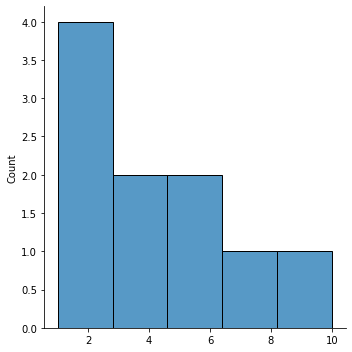

In [13]:
sns.displot(data_arr);

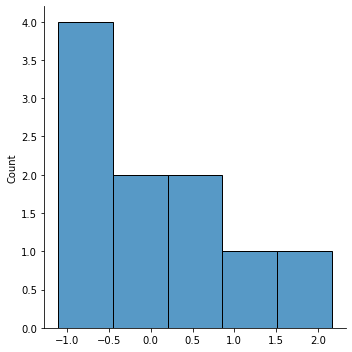

In [14]:
sns.displot(standard_scale(data_arr)[0]);

Using this method in sklearn can be done in a similar way as min-max scaling

In [15]:
from sklearn.preprocessing import StandardScaler # load scaler from sklearn

# define data to be scaled 
x = df.drop(columns=['Target', 'Feature_4'])
x['Feature_2'] = x['Feature_2'].fillna(x['Feature_2'].mean()) # impute missing values if needed

scaler = StandardScaler() # instantiate the scaler
scaler_fit = scaler.fit(x) # fit the scaler on the data
x_sc = scaler_fit.transform(x) # tranform the data using the fitted scaler

display(x_sc) # the output of the tranformation is an array

array([[ 1.08607695e+00,  1.01259775e-01, -1.03377770e+00],
       [-5.04216601e-01, -2.66957590e-01, -1.03377770e+00],
       [-1.06549668e+00,  2.08963355e+00, -7.54378321e-01],
       [-3.17123243e-01, -1.37160969e+00, -4.74978943e-01],
       [ 1.50610154e-01,  3.27042718e-16,  8.38198134e-02],
       [ 2.02154374e+00,  1.13226840e+00,  8.38198134e-02],
       [-8.78403318e-01,  3.22190195e-01,  2.31901484e+00],
       [-8.97112654e-01,  3.27042718e-16, -4.74978943e-01],
       [-6.81955292e-01, -6.35174955e-01,  8.38198134e-02],
       [ 1.08607695e+00, -1.37160969e+00,  1.20141733e+00]])

In [16]:
x.describe()

,Feature_1,Feature_2,Feature_3
count,10.000000,10.000000,10.000000
mean,1.839000,2.862500,2.850000
std,1.126809,1.431346,1.886355
min,0.700000,1.000000,1.000000
25%,0.952500,2.125000,1.625000
50%,1.400000,2.862500,2.500000
75%,2.750000,3.225000,3.000000
max,4.000000,5.700000,7.000000


In [17]:
x_sc_df = pd.DataFrame(x_sc, columns=x.columns)
x_sc_df 

,Feature_1,Feature_2,Feature_3
0,1.086077,1.012598e-01,-1.033778
1,-0.504217,-2.669576e-01,-1.033778
2,-1.065497,2.089634e+00,-0.754378
3,-0.317123,-1.371610e+00,-0.474979
4,0.150610,3.270427e-16,0.083820
5,2.021544,1.132268e+00,0.083820
6,-0.878403,3.221902e-01,2.319015
7,-0.897113,3.270427e-16,-0.474979
8,-0.681955,-6.351750e-01,0.083820
9,1.086077,-1.371610e+00,1.201417


### 2. Categorical variables
All machine models take numerical variables as input. However, many models reach high performance becuase of different levels of categorical data. The end goal is to let the training algorithm knows how to fit the data using the categorical factor. Hence, categorical variables are to be processed/encoded into an algorithm-friendly input <br>

First, let's see the power of categorical variable on fitting our example dataset. The boxplot shows the distribution of the target between category A and B. 

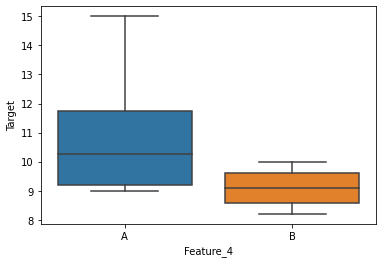

In [18]:
sns.boxplot(x=df['Feature_4'], y=df['Target']);

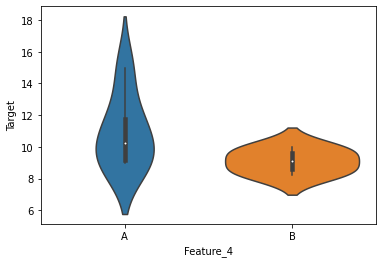

In [19]:
sns.violinplot(x=df['Feature_4'], y=df['Target']);

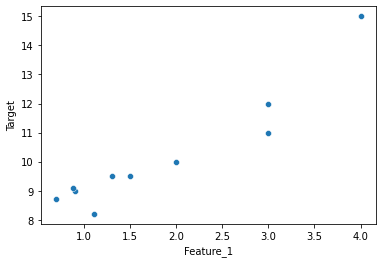

In [20]:
sns.scatterplot(x=df['Feature_1'], y=df['Target']);

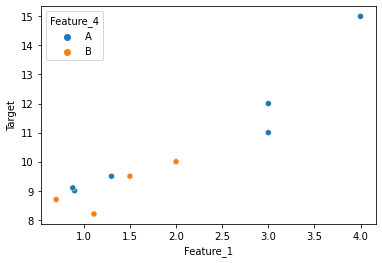

In [21]:
sns.scatterplot(x=df['Feature_1'], y=df['Target'], hue=df['Feature_4']);

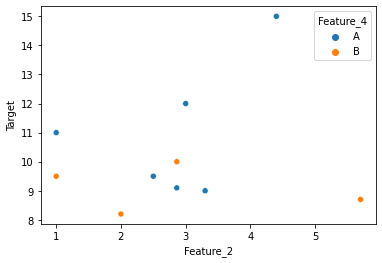

In [22]:
sns.scatterplot(x=df['Feature_2'].fillna(df['Feature_2'].mean()), 
                y=df['Target'], hue=df['Feature_4']);

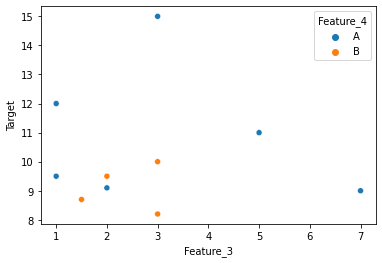

In [23]:
sns.scatterplot(x=df['Feature_3'], 
                y=df['Target'], hue=df['Feature_4']);

From visualizations, we that category A and B offers the different level of target variable. Therefore, we need to encode this label into a continous/numerical value. 

#### 2.1 Label Encoder 
Label encoder transform non-numerical labels to numerical labels by taking the one of the labels as the reference point. So that label will have a value of zero.

In [24]:
from sklearn.preprocessing import LabelEncoder # load encoder from sklearn 

x = df[['Feature_4']] # data input
enc = LabelEncoder() # instantiate the encoder 
le = enc.fit(x) # fit the encoder 
x_enc = le.transform(x) # tranform the encode

pd.concat([x, pd.Series(x_enc, name='Feature_4_enc')], axis=1)

C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Feature_4,Feature_4_enc
0,A,0
1,A,0
2,B,1
3,B,1
4,B,1
5,A,0
6,A,0
7,A,0
8,B,1
9,A,0


#### 2.2 One-hot encoder
Label encoder transform non-numerical labels to numerical labels by creating a matrix that has the number of columns to be the same as the number of categories. There will be no reference point. 

In [25]:
from sklearn.preprocessing import OneHotEncoder # load encoder from sklearn 

x = df[['Feature_4']] # data input
enc = OneHotEncoder() # instantiate the encoder 
oe = enc.fit(x) # fit the encoder 
x_enc = oe.transform(x) # tranform the encode

display(x_enc.toarray())

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [26]:
pd.concat([x, pd.DataFrame(x_enc.toarray(), columns=oe.categories_)], axis=1)

,Feature_4,"(A,)","(B,)"
0,A,1.0,0.0
1,A,1.0,0.0
2,B,0.0,1.0
3,B,0.0,1.0
4,B,0.0,1.0
5,A,1.0,0.0
6,A,1.0,0.0
7,A,1.0,0.0
8,B,0.0,1.0
9,A,1.0,0.0


Or even easier, doing this using pd.get_dummies

In [27]:
x_enc = pd.get_dummies(x)
display(x_enc)

,Feature_4_A,Feature_4_B
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


#### 2.3 The effect of encoding methods on the model performance
Two encoding gives the same model performance (see R-squared and residuals). The decision on which encoding methods shall be used depends on how do you like to read the interpretation of the categorical variable. In one way you see one category ommitted as it is the reference level. On the other hand, having all categories as columns also makes it easy to interpret.

In [28]:
import statsmodels.api as sm # statsmodels to build regression model

The case of label encoder

In [29]:
# label encoder
y = df[['Target']]
x = df[['Feature_1', 'Feature_4']]

cat = df[['Feature_4']] # data input
enc = LabelEncoder() # instantiate the encoder 
le = enc.fit(cat) # fit the encoder 
cat_enc = le.transform(cat) # tranform the encode

x = pd.concat([x[['Feature_1']], pd.Series(cat_enc, name='Feature_4_enc')], axis=1)
x

C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Feature_1,Feature_4_enc
0,3.00,0
1,1.30,0
2,0.70,1
3,1.50,1
4,2.00,1
5,4.00,0
6,0.90,0
7,0.88,0
8,1.11,1
9,3.00,0


C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     31.03
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           0.000332
Time:                        10:55:29   Log-Likelihood:                -9.2641
No. Observations:                  10   AIC:                             24.53
Df Residuals:                       7   BIC:                             25.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4278      0.592     12.542      0.000       6.027       8.828
Feature_1         1.6081      0.235      6.851      0.000       1.053       2.163
Feature_4_enc    -0.4625      0.512     -0.903      0.397      -1.674       0.749
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.066
Skew:                          -0.185   Prob(JB):                        0.968
Kurtosis:                       3.145   Cond. No.                         7.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:ylabel='Frequency'>

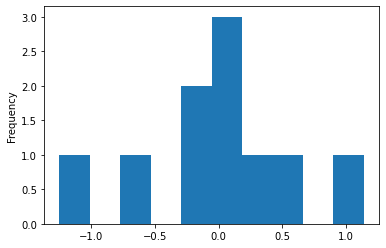

In [30]:
# fit the model
X = sm.add_constant(x)
y = y
    
lr = sm.OLS(y, X).fit()
display(lr.summary())
lr.resid.plot(kind='hist')

The case of one-hot encoder

In [31]:
# label encoder
y = df[['Target']]
x = df[['Feature_1', 'Feature_4']]

cat_enc = pd.get_dummies(x[['Feature_4']])

x = pd.concat([x[['Feature_1']], cat_enc], axis=1)
x

,Feature_1,Feature_4_A,Feature_4_B
0,3.00,1,0
1,1.30,1,0
2,0.70,0,1
3,1.50,0,1
4,2.00,0,1
5,4.00,1,0
6,0.90,1,0
7,0.88,1,0
8,1.11,0,1
9,3.00,1,0


C:\Users\natanop.pimonsathian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     31.03
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           0.000332
Time:                        10:55:29   Log-Likelihood:                -9.2641
No. Observations:                  10   AIC:                             24.53
Df Residuals:                       7   BIC:                             25.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7977      0.316     15.171      0.000       4.050       5.545
Feature_1       1.6081      0.235      6.851      0.000       1.053       2.163
Feature_4_A     2.6301      0.333      7.908      0.000       1.844       3.417
Feature_4_B     2.1676      0.266      8.162      0.000       1.540       2.796
==============================================================================
Omnibus:                        1.149   Durbin-Watson:                   1.263
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.066
Skew:                          -0.185   Prob(JB):                        0.968
Kurtosis:                       3.145   Cond. No.                     1.72e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:ylabel='Frequency'>

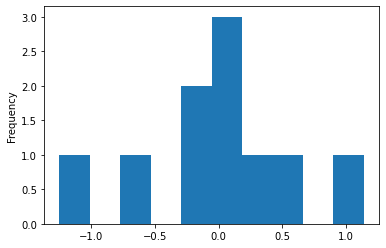

In [32]:
# fit the model
X = sm.add_constant(x)
y = y
    
lr = sm.OLS(y, X).fit()
display(lr.summary())
lr.resid.plot(kind='hist')